## This script takes individual files with MAG kofam annotations and compares gene representation in KEGG categories across categories. 

### Import all the dependencies

In [1]:
import os as os
import numpy as np
import pandas as pd
import glob as glob

### Navigate to working directory

In [2]:
os.chdir('/Users/nastassia.patin/Desktop/Projects/Lasker 2019/PacBio/euk-MAGs/eggnog')

### Import the "master" KO htext file and reformat it

In [3]:
# provide the directory where the master KO Orthology file is located
path = '/Users/nastassia.patin/Desktop/Workflows/KO_Orthology_ko00001.txt'

In [4]:
ko_master = pd.read_csv(path, sep='\t', header=None,
                       names=['Group','Subgroup1','Subgroup2','KO'])
ko_master.head()

,Group,Subgroup1,Subgroup2,KO
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00844 HK; hexokinase [EC:2.7.1.1]
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K12407 GCK; glucokinase [EC:2.7.1.2]
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00845 glk; glucokinase [EC:2.7.1.2]
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K01810 GPI, pgi; glucose-6-phosphate isomeras..."
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K06859 pgi1; glucose-6-phosphate isomerase, a..."


### The following steps edit the master file so the fields only contain text information about the gene function. They are optional if you want to keep the numerical codes associated with groups and subgroups.

In [5]:
# Split the function from the KO
ko_master[['KO', 'Function']] = ko_master['KO'].str.split(" ", n=1, expand=True)
# Split out the number label for groups and subgroups
ko_master[['Subgroup2', 'PATH']] = ko_master['Subgroup2'].str.split("[", n=1, expand=True)
ko_master = ko_master.drop('PATH', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Group']] = ko_master['Group'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Subgroup1']] = ko_master['Subgroup1'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Subgroup2']] = ko_master['Subgroup2'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
ko_master.head()

,Group,Subgroup1,Subgroup2,KO,Function
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00844,HK; hexokinase [EC:2.7.1.1]
1,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K12407,GCK; glucokinase [EC:2.7.1.2]
2,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00845,glk; glucokinase [EC:2.7.1.2]
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5..."
4,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K06859,"pgi1; glucose-6-phosphate isomerase, archaeal..."


### Extract list of KOs in each MAG from EggNOG mapper annotations

In [12]:
eggnog = pd.read_csv("Bathycoccus.emapper.annotations.tsv", sep="\t", skiprows=4)
eggnog.head()

#### Extract KO numbers from EggNOG output and match to KEGG categories in master file

In [6]:
def ko_function(eg, master, name):
    eg['KEGG_ko'] = eg['KEGG_ko'].str.replace('ko:','')
    ko_list = list(eg['KEGG_ko'])
    # extract only KOs that are in the ko_list from master file
    kos_funct = master.loc[master['KO'].isin(ko_list), :]
    kos_funct['MAG'] = name
    return(kos_funct)

In [7]:
genecontent = []
for file in glob.glob("*.tsv"):
    eggnog = pd.read_csv(file, sep='\t', skiprows=4)
    a, b, c, d = file.split('.')
    df = ko_function(eggnog, ko_master, a)
    genecontent.append(df)

genecontent_df = pd.concat(genecontent)

<ipython-input-6-73411bd95fd1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kos_funct['MAG'] = name
<ipython-input-6-73411bd95fd1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kos_funct['MAG'] = name


In [8]:
genecontent_df['MAG'].unique()

array(['Bathycoccus', 'Ostreococcus'], dtype=object)

In [9]:
genecontent_df.head()

,Group,Subgroup1,Subgroup2,KO,Function,MAG
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5...",Bathycoccus
7,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00850,"pfkA, PFK; 6-phosphofructokinase 1 [EC:2.7.1.11]",Bathycoccus
12,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K03841,"FBP, fbp; fructose-1,6-bisphosphatase I [EC:3...",Bathycoccus
17,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01623,"ALDO; fructose-bisphosphate aldolase, class I...",Bathycoccus
23,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01803,"TPI, tpiA; triosephosphate isomerase (TIM) [E...",Bathycoccus


### Replace MAG name with taxonomy

In [10]:
taxa = pd.read_csv("MAG_taxa.csv", names=['MAG', 'Taxonomy'])
taxa = pd.Series(taxa.Taxonomy.values, index=taxa.MAG).to_dict()
genecontent_df = genecontent_df.replace({"MAG": taxa})

## Group genes by category and make bar charts

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

### Group by the highest category ("Group") and get counts for each category

In [11]:
mag_group = genecontent_df.groupby(['MAG', 'Group'])['Subgroup1'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
mag_group

MAG           Group                               
Bathycoccus   Brite Hierarchies                       0.377419
              Cellular Processes                      0.077250
              Environmental Information Processing    0.050255
              Genetic Information Processing          0.113243
              Human Diseases                          0.118676
              Metabolism                              0.157555
              Not Included in Pathway or Brite        0.020034
              Organismal Systems                      0.085569
Ostreococcus  Brite Hierarchies                       0.386082
              Cellular Processes                      0.074173
              Environmental Information Processing    0.048168
              Genetic Information Processing          0.119090
              Human Diseases                          0.121306
              Metabolism                              0.149823
              Not Included in Pathway or Brite        0.018765
    

In [12]:
df_group = pd.DataFrame(mag_group).reset_index()

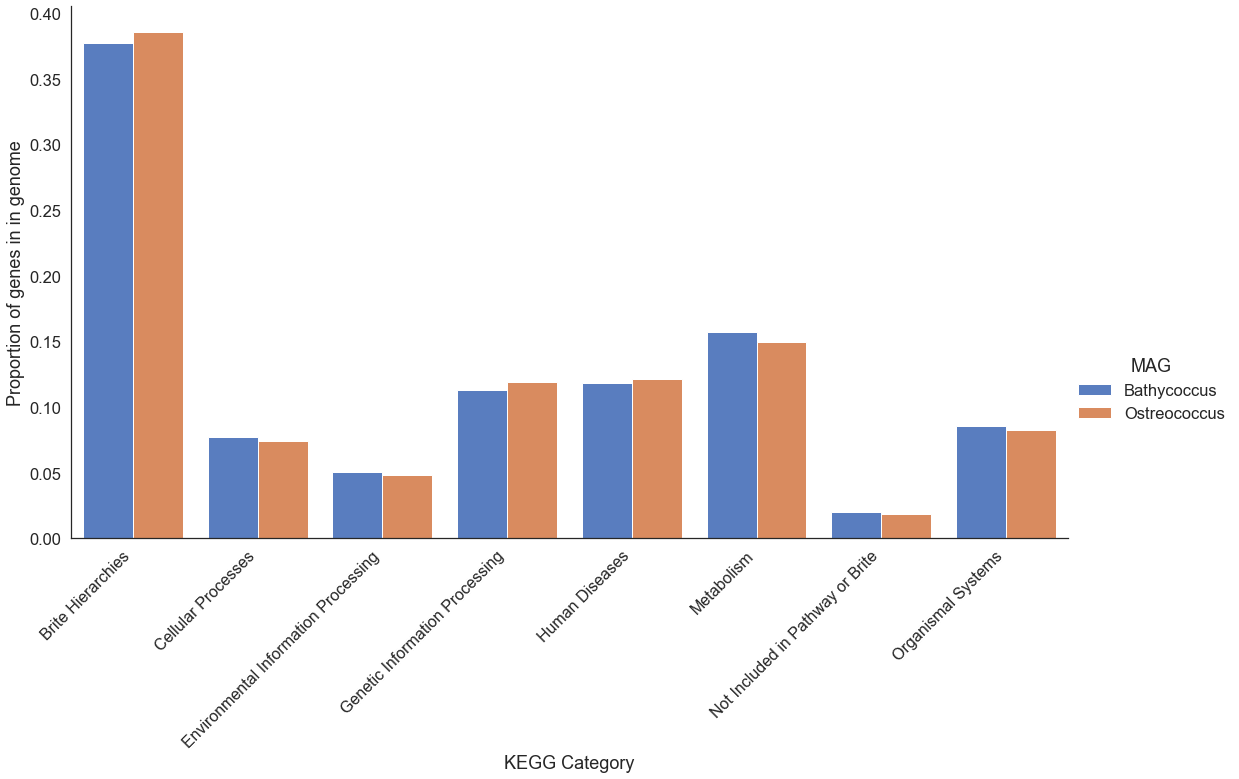

In [13]:
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Group", y="Subgroup1", hue="MAG", data=df_group, kind='bar' , height=8.27, aspect=15/8.27,
                 palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Category", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(rotation=45, ha='right', fontsize=16)

In [14]:
fig.savefig("Picoeuk_MAGs_genecontent.png")

### Look at only the 'Metabolism' genes

In [15]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1'])['Subgroup2'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_metab = df_group.loc[(slice(None), ['Metabolism']), :] 
df_group_metab.head()

Subgroup2
MAG         Group      Subgroup1                                             
Bathycoccus Metabolism Amino acid metabolism                         0.027674
                       Biosynthesis of other secondary metabolites   0.004584
                       Carbohydrate metabolism                       0.030900
                       Energy metabolism                             0.021392
                       Glycan biosynthesis and metabolism            0.008829

In [16]:
df_group_metab = df_group_metab.reset_index()

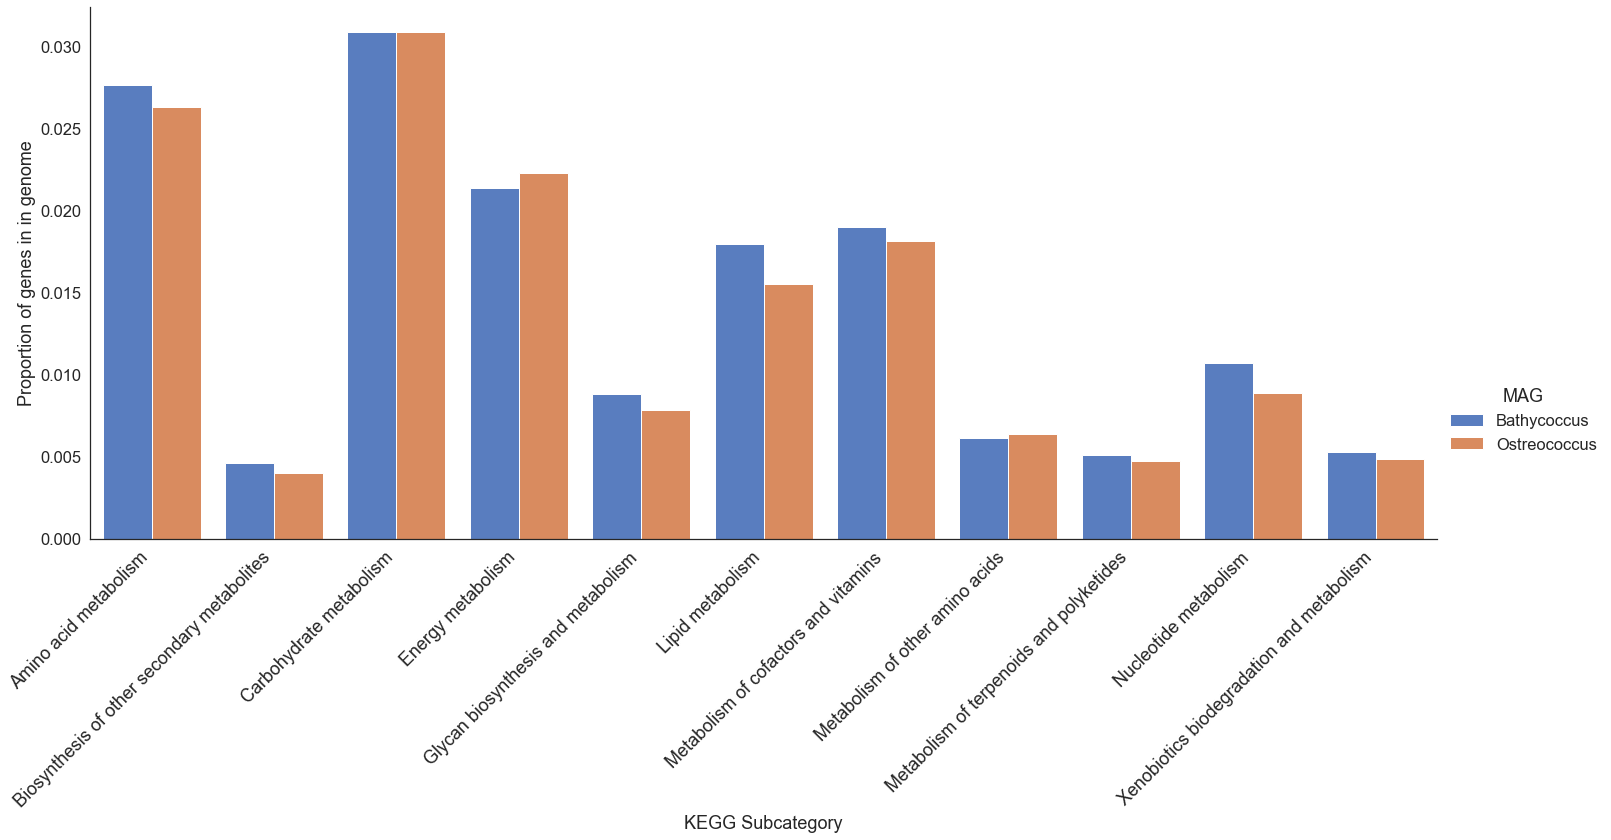

In [17]:
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Subgroup1", y="Subgroup2", hue="MAG", data=df_group_metab, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(rotation=45, ha='right', fontsize=18)

In [18]:
fig.savefig("Picoeuks_MAGs_metabolism_genecontent.png")

In [46]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1','Subgroup2'])['KO'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_metab = df_group.loc[(slice(None), ['Metabolism']), :] 
df_group_metab.head()

KO
MAG         Group      Subgroup1             Subgroup2                                             
Bathycoccus Metabolism Amino acid metabolism Alanine, aspartate and glutamate metabolism   0.002886
                                             Arginine and proline metabolism               0.002207
                                             Arginine biosynthesis                         0.002377
                                             Cysteine and methionine metabolism            0.003735
                                             Glycine, serine and threonine metabolism      0.003735

In [43]:
df_group_metab = df_group_metab.reset_index()

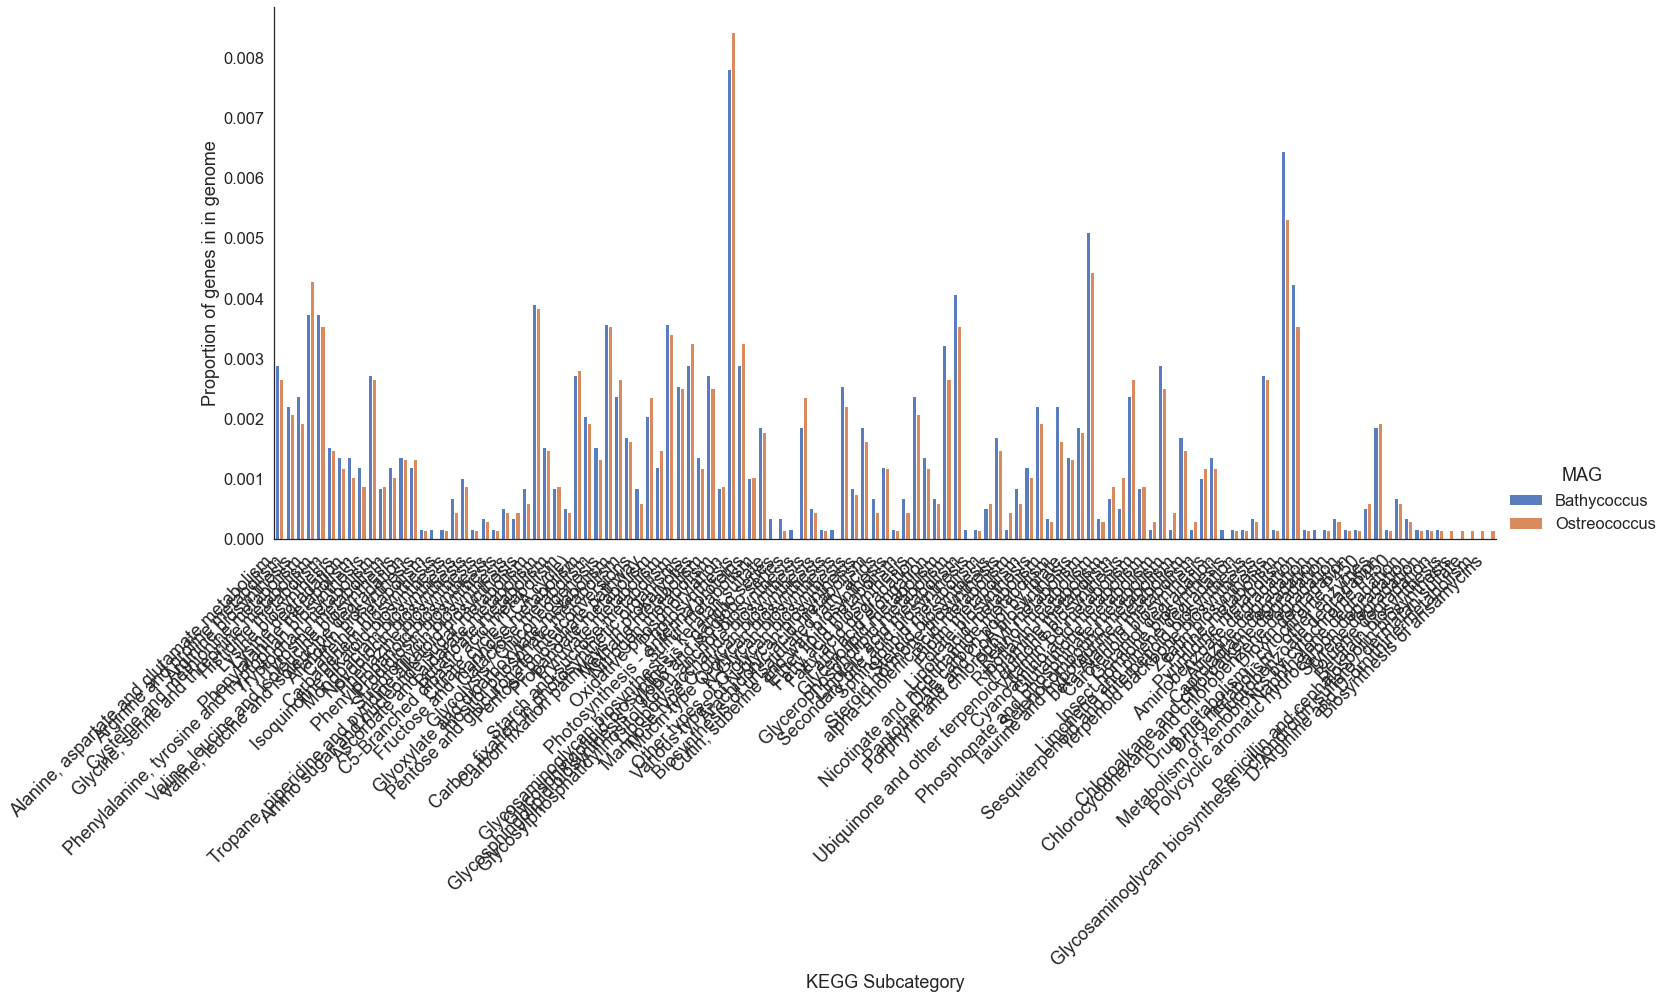

In [44]:
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Subgroup2", y="KO", hue="MAG", data=df_group_metab, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(rotation=45, ha='right', fontsize=18)

### Look at only the 'Genetic Information Processing' genes

In [31]:
df_group_genetic = df_group.loc[(slice(None), ['Genetic Information Processing']), :] 
df_group_genetic.head()

KO
MAG         Group                          Subgroup1                        Subgroup2                                             
Bathycoccus Genetic Information Processing Folding, sorting and degradation Proteasome                                    0.004924
                                                                            Protein export                                0.002377
                                                                            Protein processing in endoplasmic reticulum   0.007470
                                                                            RNA degradation                               0.006452
                                                                            SNARE interactions in vesicular transport     0.002547

In [32]:
df_group_genetic = df_group_genetic.reset_index()
df_group_genetic.head()

,MAG,Group,Subgroup1,Subgroup2,KO
0,Bathycoccus,Genetic Information Processing,"Folding, sorting and degradation",Proteasome,0.004924
1,Bathycoccus,Genetic Information Processing,"Folding, sorting and degradation",Protein export,0.002377
2,Bathycoccus,Genetic Information Processing,"Folding, sorting and degradation",Protein processing in endoplasmic reticulum,0.007470
3,Bathycoccus,Genetic Information Processing,"Folding, sorting and degradation",RNA degradation,0.006452
4,Bathycoccus,Genetic Information Processing,"Folding, sorting and degradation",SNARE interactions in vesicular transport,0.002547


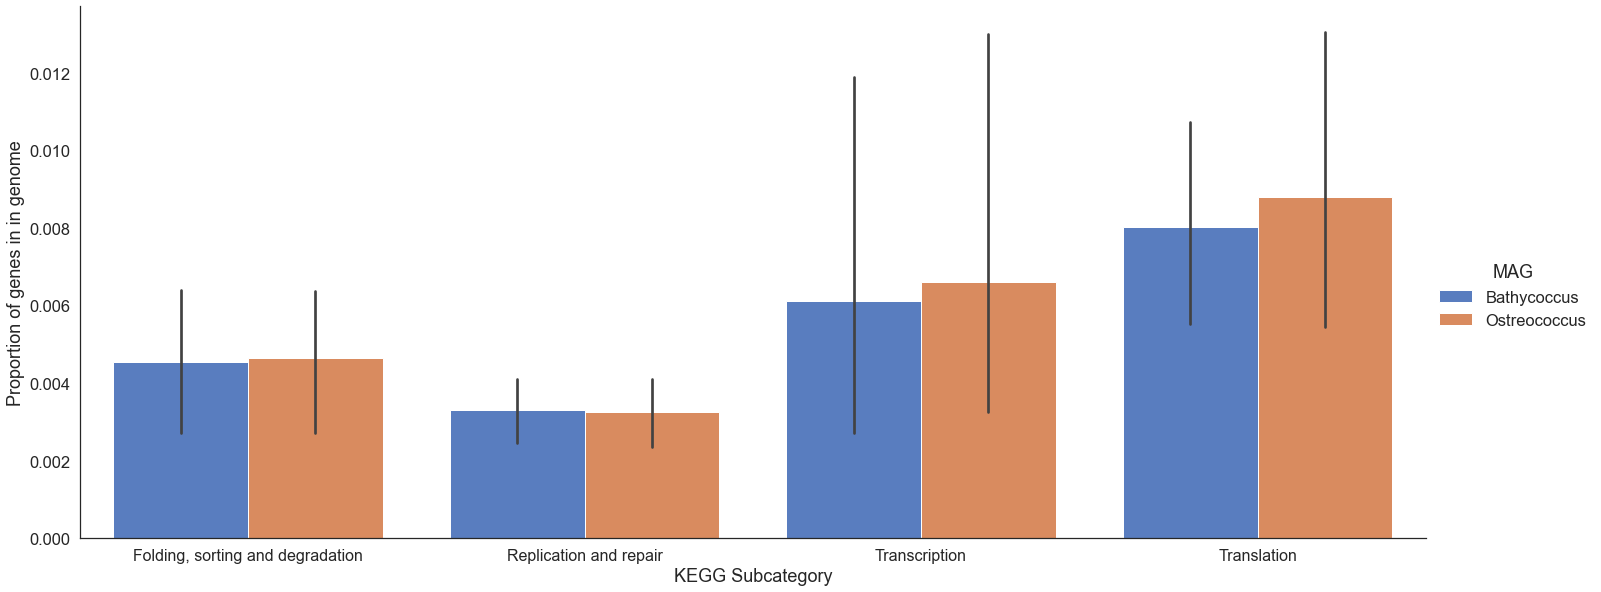

In [34]:
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Subgroup1", y="KO", hue="MAG", data=df_group_genetic, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(fontsize=16)

In [38]:
fig.savefig("BH_Deeps_MAGs_genetic_genecontent.png")

### Look at only the 'Environmental Information Processing' genes

In [21]:
df_group_eip = df_group.loc[(slice(None), ['Environmental Information Processing']), :] 
df_group_eip.head()

Subgroup2
MAG          Group                                Subgroup1                                     
Bathycoccus  Environmental Information Processing Membrane transport                    0.002207
                                                  Signal transduction                   0.047538
                                                  Signaling molecules and interaction   0.000509
Ostreococcus Environmental Information Processing Membrane transport                    0.001773
                                                  Signal transduction                   0.045952

In [22]:
df_group_eip = df_group_eip.reset_index()

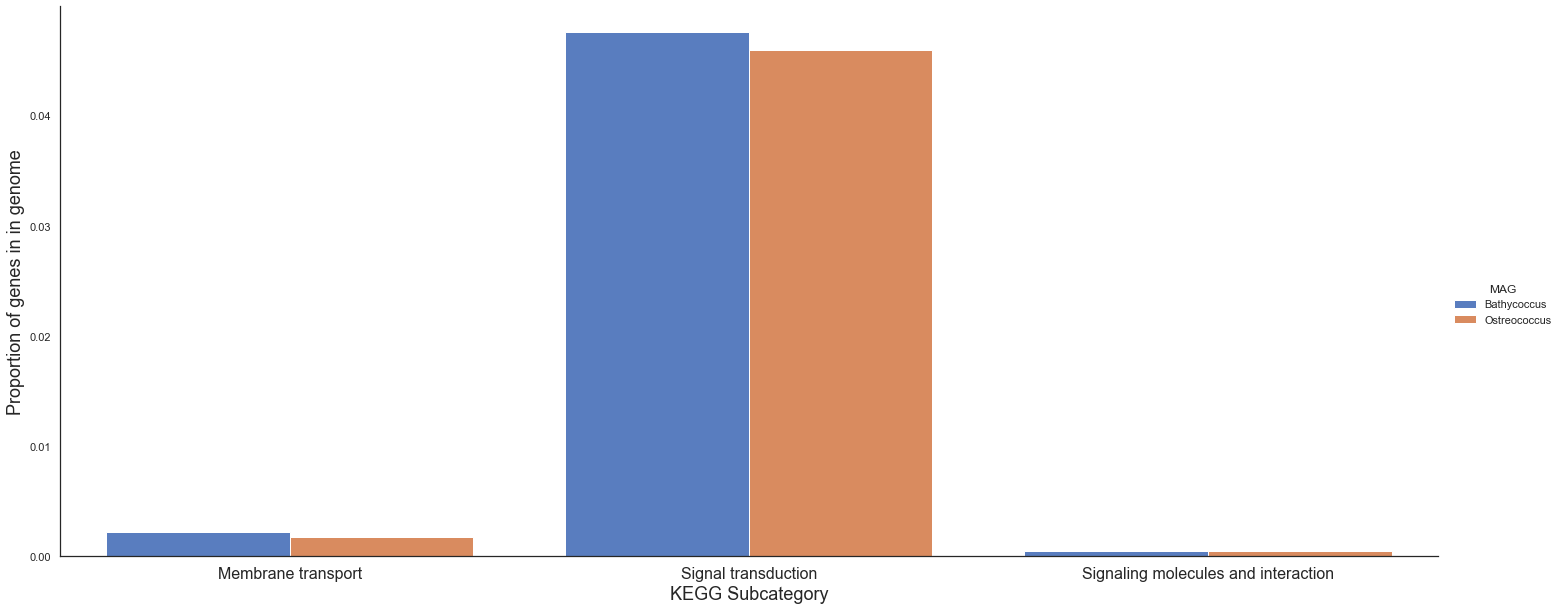

In [23]:
sns.set(style="white")
sns.set_color_codes("muted")
fig = sns.catplot(x="Subgroup1", y="Subgroup2", hue="MAG", data=df_group_eip, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(fontsize=16)

In [27]:
fig.savefig("BH_Deeps_MAGs_EIP_genecontent.png")

### Look at only "Energy metabolisms" genes

In [75]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1',
                                    'Subgroup2'])['KO'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_energymetab = df_group.loc[(slice(None), slice(None), ['Glycan biosynthesis and metabolism']), :] 
df_group_energymetab.head()

KO
MAG         Group      Subgroup1                          Subgroup2                                                   
Bathycoccus Metabolism Glycan biosynthesis and metabolism Glycosaminoglycan biosynthesis - keratan sulfate    0.000340
                                                          Glycosphingolipid biosynthesis - ganglio series     0.000340
                                                          Glycosphingolipid biosynthesis - globo and isog...  0.000170
                                                          Glycosylphosphatidylinositol (GPI)-anchor biosy...  0.001868
                                                          Lipopolysaccharide biosynthesis                     0.000509

In [76]:
df_group_energymetab = df_group_energymetab.reset_index()

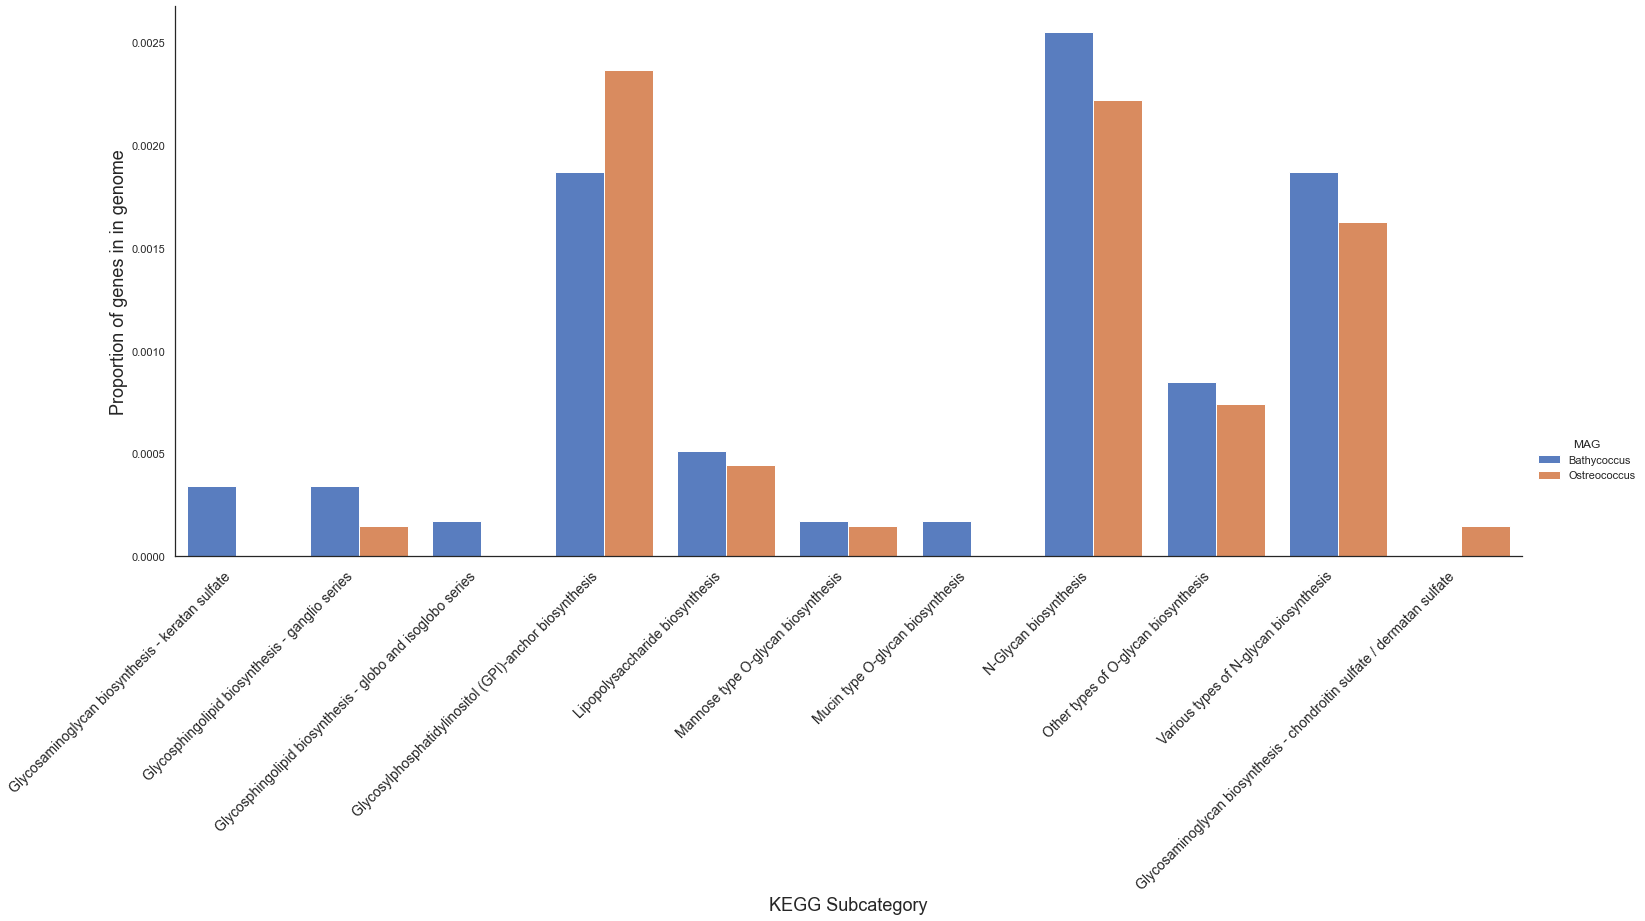

In [77]:
sns.set(style="white")
sns.set_color_codes("muted")
fig = sns.catplot(x="Subgroup2", y="KO", hue="MAG", data=df_group_energymetab, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18) 
fig.set_xticklabels(rotation=45, ha='right', fontsize=14)

In [78]:
fig.savefig("Picoeuk_MAGs_glycanmetab_genecontent.png")

In [32]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1',
                                    'Subgroup2'])

In [33]:
mag_group.head()

,Group,Subgroup1,Subgroup2,KO,Function,MAG
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5...",BH28 (Patescibacteria)
19,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01624,"FBA, fbaA; fructose-bisphosphate aldolase, cl...",BH28 (Patescibacteria)
20,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01622,"K01622; fructose 1,6-bisphosphate aldolase/ph...",BH28 (Patescibacteria)
23,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01803,"TPI, tpiA; triosephosphate isomerase (TIM) [E...",BH28 (Patescibacteria)
24,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00134,"GAPDH, gapA; glyceraldehyde 3-phosphate dehyd...",BH28 (Patescibacteria)
...,...,...,...,...,...,...
51541,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K06871,K06871; uncharacterized protein,BH29 (Marinisomatota)
51549,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K06888,K06888; uncharacterized protein,BH29 (Marinisomatota)
51550,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K06889,K06889; uncharacterized protein,BH29 (Marinisomatota)
51560,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K06911,K06911; uncharacterized protein,BH29 (Marinisomatota)


In [37]:
genecontent_df.to_csv("All_MAGs_genecontent.csv", index=None)